## Linear Regression

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#y_hat = wX
#@ in numpy means matrix multiplication
#self.w is a numpy array

class Linear_Regression():
    def fit(self,X,y):
        self.w = np.linalg.solve(XT@X,XT@y)
    def predict(self,X):
        return np.matmul(X,self.w)
        
        
        
        
        

# Creating a Linear Regression Class
https://towardsdatascience.com/linear-regression-with-python-and-numpy-25d0e1dd220d

In [6]:

class LinearRegression:
    def fit(self,X,Y):
            X=np.array(X).reshape(-1,1)
            Y=np.array(Y).reshape(-1,1)
            x_shape = X.shape
            self.parameter_cache = []
            num_var = x_shape[1]       #the shape corresponds to number of input variable dimensions. There’s only one for this dataset i.e weight of person
            self.weight_matrix = np.random.normal(-1,1,(num_var,1))
            self.intercept = np.random.rand(1)
            for i in range(50):
                    self.dcostdm = np.sum(np.multiply(((np.matmul(X,self.weight_matrix)+self.intercept)-Y),X))*2/x_shape[0] #w.r.t to the weight
                    self.dcostdc = np.sum(((np.matmul(X,self.weight_matrix)+self.intercept)-Y))*2/x_shape[0]          #partial derivative of cost w.r.t the intercept
                    self.weight_matrix -= 0.1*self.dcostdm                                                                  #updating the weights with the calculated gradients
                    self.intercept -= 0.1*self.dcostdc                                                                      #updating the weights with the calculated gradients
                    self.parameter_cache.append(np.array((self.weight_matrix,self.intercept)))                             #the parameters are cached just to track the progress
            return self.weight_matrix,self.intercept,self.parameter_cache
    def predict(self,X):
        product = np.matmul(np.array(X).reshape(-1,1),self.weight_matrix)+self.intercept
        return product

## KNN regressor



In [4]:
#y_hat_sub_i is our prediction, and the function(x_sub_i) is the fucntion  
# y_sub_i = function(x_sub_i) + error
# error_sub_i = y_sub_i - y_hat_sub_of_i
#y_hat_sub_i = function(X_sub_I)

class KNN_regressor():
    
    def fit(self,X,y):
        self.X = X
        self.y = y
        
    def predict(self,X,K,epsilon=1e-3):
        N=len(X)
        y_hat = np.zeros(N)
        
        for i in range(N): #going just once to every point
            
            dist2 = np.sum((self.X - X[i])**2,axis=1) #distance squared is sum of X - X_sub_i squared
            idxt = np.argsort(dist2)[:K] #top case
            gamma_k = np.exp(-dist2[idxt])/np.exp(-dist2[idxt]).sum()#gamma sub k negative dist2 over -dist2 index .sum
            y_hat[i] = gamma_k.dot(self.y[idxt]) #y_hat_sub_i .dot product, multiply gamma with top y
            
        return y_hat
            
            
            
        
        
        
    

In [5]:
#fake data generator for testing
class data_gen():
    
    def create(self,D,N,r=20):
        self.X = np.linspace(0,r,N).reshape(N,D)
        self.y = np.sqrt(self.X)+np.exp(-(self.X-5)**2)-2*(np.exp(-(self.X-12.5)**2)+np.random.randn(N,1)*0.2)
        return self.X,self.y
    
    def show(self):
        plt.figure()
        plt.scatter(self.X,self.y)
        
     
        
        
    
    

In [6]:
myDat = data_gen()


In [7]:
X,y = myDat.create(1,200)

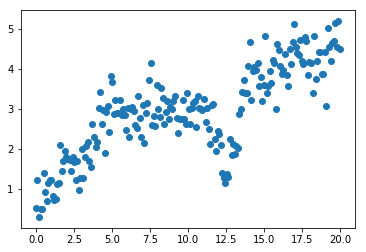

In [8]:
myTestDat = data_gen()
X1,y1 = myTestDat.create(1,200)
myTestDat.show()

In [9]:
knn2 = KNN_regressor()

In [10]:
knn2.fit(X1,y1)

In [20]:
y_hat1 = knn.predict(X1,10,epsilon=1e-2)

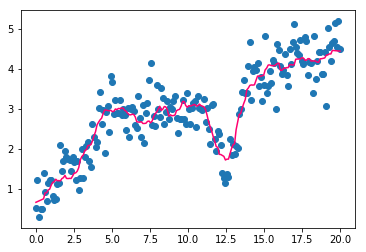

In [21]:
plt.figure()
plt.scatter(X1,y1)
plt.plot(X1,y_hat1,color='#FF0070')

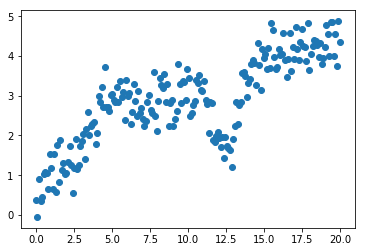

In [13]:
myDat.show()

In [14]:
knn = KNN_regressor()

In [15]:
knn.fit(X,y)

In [16]:
y_hat = knn.predict(X,10,epsilon=1e-2)
#smaller k overfits 

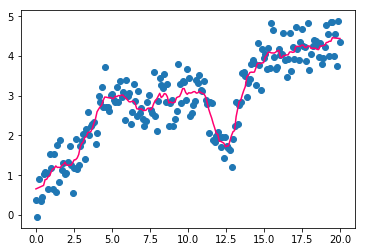

In [17]:
plt.figure()
plt.scatter(X,y)
plt.plot(X,y_hat,color='#FF0070')

In [18]:
y_hat2 = knn.predict(X1,200,epsilon=1e-2)

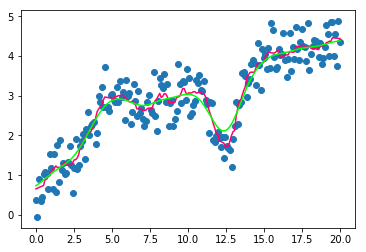

In [19]:
plt.figure()
plt.scatter(X,y)
plt.plot(X,y_hat,color='#FF0070')
plt.plot(X1,y_hat2,color='#00FF00')

## definitions in python

R2 =  1 - np.sum((y-y_hat)**2)/np.sum((y-np.mean(y))**2)

## Regularization

regularization: have models fit to functions to respond better to training data and avoid overfitting
higher variance has a higher bias, higer variance low accuracy 

L1 regularization  is lasso regression
lasso regression : Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

Lasso stands for least absolute shrinkage selection operator
Lassio is a cheap method of dimesionality reduction

L2 is called Ridge: Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function. Here the highlighted part represents L2 regularization element.

L1 = for a lot of features
L2 = for a lot of outliers
Ln(2): add lambda from L1 and lambda from L2 together

https://www.statisticshowto.com/lasso-regression/#:~:text=Lasso%20regression%20is%20a%20type,i.e.%20models%20with%20fewer%20parameters).


https://towardsdatascience.com/regularization-an-important-concept-in-machine-learning-5891628907ea#:~:text=Regularization%20is%20a%20technique%20used,don%27t%20take%20extreme%20values.

https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c

https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261

## Graident Descent 

Jw = F(w,x,hyperparameter) = your error will be a function of your weights your data and hyperparameter

what we want to find out is what will produce the lowest error

how it works:
pick a random point
go up
take the gradiant of the error
find a direction where the error is smaller and move towards that direction
check and move at each iteration until you cant move that direction anymore

optimizers = modify gradiant descent, example nesterov momentum

https://dominikschmidt.xyz/nesterov-momentum/

https://www.geeksforgeeks.org/gradient-descent-in-linear-regression/

https://www.jefkine.com/general/2018/05/21/2018-05-21-vanishing-and-exploding-gradient-problems/


## ALWAYS NORMALIZE DATA

## Get geographic information from an address

In [3]:
#import geo py
from geopy import Nominatim

In [4]:
geo_locator = Nominatim(user_agent="AmericasNTM")

In [14]:
location = geo_locator.geocode("1202 W irvington rd Tucson ")

In [15]:
print(location)

1202, West Irvington Road, Tucson, Pima County, Arizona, 85714, United States


In [19]:
location.point

Point(32.16327358031235, -110.99063172188059, 0.0)

In [35]:
raw_loc = location.raw
type(raw_loc)

dict

## Linear regression with graident descent and LP Regularization

In [40]:
#golbal helper function
def OLS(Y,Y_hat,N):
    return (1/(2*N))*np.sum((Y-Y_hat)**2)

def R_squared(Y,Y_hat):
    return (1 - (np.sum((Y-Y_hat)**2)/np.sum((Y - np.mean(Y))**2)))
    

In [44]:
class Our_Linear_Regression():
    
    def fit(self,X,y,epochs = 1e3,eta=1e-3,show_curve = False,lambd = 0,p = 1):
        
        #define epoch, epoch is the number of repeations we will use
        epoch = int(epochs)
        
        N,D = X.shape
        Y = y
        
        self.W = np.random.randn(D)
        J = np.zeros(epochs) #numpy array to plot later
        
        for epoch in range(epochs):
            Y_hat = self.predict(X)
            #objective calculation
            J[epoch] = OLS(Y,Y_hat,N)+(lambd/(p*N))*np.linalg.norm(self.W,ord=p,keepdims=True)
            #weight update rule, what happens to the weights every iteration
            self.W -= eta*(1/N)*(X.T@(Y_hat - Y) + (1/N)*(lambd*np.abs(self.W)**(p-1)*np.sign(self.W)))
            
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("$\mathcal(J)$")
            plt.title("Training Curve")
            plt.show()
            
    def predict(self,X):
        return X@self.W
        
            
            
        
        
    
    